# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## Introduction to scikit-image

The modules which are commonly used are entered in the following cell.

In [16]:
%matplotlib inline
%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

Pretty printing has been turned ON


### Image in skimage

The first step of this practise is to learn the procedure to deal with image in `python`.

In this regard, you will need to refer to two main modules of *skimage*. The first module will give all information about [input-output](http://scikit-image.org/docs/dev/api/skimage.io.html) in order to read, write, and show image. The second module is as important and refers to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) which allow you to know what is the data type of the images.

#### IO module

In this part, you will rely on the module **io** of the `skimage`. This module can be imported as:

In [17]:
from skimage import io

Now, any function of this module can be called by `io.name_of_the_function`. See the following [webpage](http://scikit-image.org/docs/dev/api/skimage.io.html) to know all the functions available and the arguments of each of them.

##### imread() and imshow()

We will first play with the functions `io.imread()` and `io.imshow()` in order to read and show images. Refer to the documentation to know about the input and output arguments associated with this function. 

**The first task will be to read the grayscale image called `lena-grey.bmp` and show the output.**

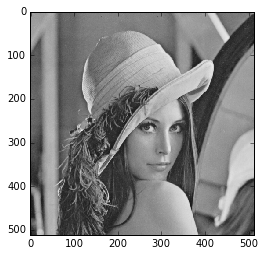

In [18]:
# Just to not make any mistakes the path is given here
filename = './images/lena-grey.bmp'

# Now read the image and display it
lena_im = io.imread(filename)

# Show Lena
io.imshow(lena_im)

**In order to understand, the data type of this image, you can print the shape and data type of the image read.** Refer to function [`shape()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [`dtype()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html) from the `numpy` library.

In [19]:
# Print information about the shape of the image
print 'The shape of the image is {} and the data type is {}'.format(lena_im.shape, lena_im.dtype)

The shape of the image is (512, 512) and the data type is uint8


The `io.imshow()` function is provided by the `skimage` library. However, it is interesting to know that this function is herited from the very well known `matplotlib` library. This library has been imported in the preamble of this document and can be called with the prefix `plt`. For instance, we can show an image as:

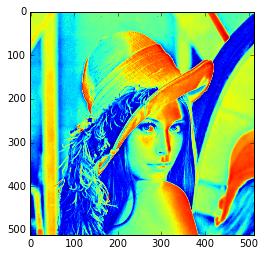

In [20]:
# Show the same image using matplotlib library
plt.imshow(lena_im)

You can see that this image is displayed with false color. Each gray level is replaced by a given color. In this specific case, bright colors are represented by red-ish and dark colors by blue-ish. This mapping is known as `colormap`. To obtain similar results than in `skimage`, we need to apply a grey colormap. More information about colormap can be found [here](http://matplotlib.org/examples/color/colormaps_reference.html).


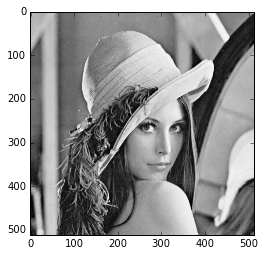

In [21]:
# Show the same image using matplotlib library and a grey colormap
plt.imshow(lena_im, cmap=cm.Greys_r)

You can do the same manipulation and open a color image using the file `vibot-color.jpg`

The shape of the image is (301, 222, 3) and the data type is uint8


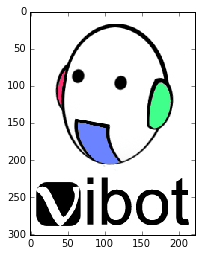

In [22]:
# Read the Vibot image which is a color image
filename = './images/vibot-color.jpg'
vibot_im = io.imread(filename)

# Print information about the shape of the image and type
print 'The shape of the image is {} and the data type is {}'.format(vibot_im.shape, vibot_im.dtype)

# Show the image
io.imshow(vibot_im)

**Check the documentation of the function `imread` and open the previous color image as a grey scale image.**

The shape of the image is (301, 222) and the data type is float64


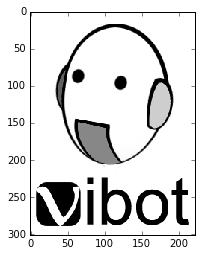

In [23]:
# Read the Vibot image which is a color image
filename = './images/vibot-color.jpg'
vibot_im = io.imread(filename, as_grey=True)

# Print information about the shape of the image and type
print 'The shape of the image is {} and the data type is {}'.format(vibot_im.shape, vibot_im.dtype)

# Show the image
io.imshow(vibot_im)

Observe attentively the change of the data type.

##### Data type

It is important to understand which type of data do you obtain once the image is loaded. Subsequent algorithms will require a certain type (*ie.*, float, unsigned int) included in a certain data range. That is why, you need to refer to the [utility functions](http://scikit-image.org/docs/stable/api/skimage.html) in order to perform the right conversion between types.

**Re-open the data from the grey-scale image `lena-grey.bmp` and print the matrix and the type which have been loaded by default.**

In [24]:
# Just to not make any mistakes the path is given here
filename = './images/lena-grey.bmp'

# Now read the image and display it
lena_im = io.imread(filename)

# Print information about the shape of the image
print 'The shape of the image is {} and the data type is {}'.format(lena_im.shape, lena_im.dtype)

print lena_im

The shape of the image is (512, 512) and the data type is uint8
[[162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 ..., 
 [ 43  43  50 ..., 104 100  98]
 [ 44  44  55 ..., 104 105 108]
 [ 44  44  55 ..., 104 105 108]]


A set of functions allow to make automatic conversion between type and range and can be called as `img_as_type()`. 

Usually, algorithms expect images as float type in the range [0.0, 1.0]. However, the previous data were coded with 8-bits unsigned integer. 

**Convert the data into float included in the range [0.0, 1.0].**

In [10]:
# Import the utility function
from skimage import img_as_float

# Make the conversion
lena_im_float = img_as_float(lena_im)

# Print information about the shape of the image
print 'The shape of the image is {} and the data type is {}'.format(lena_im_float.shape, lena_im_float.dtype)

print lena_im_float

The shape of the image is (512, 512) and the data type is float64
[[ 0.63529412  0.63529412  0.63529412 ...,  0.66666667  0.60784314
   0.50196078]
 [ 0.63529412  0.63529412  0.63529412 ...,  0.66666667  0.60784314
   0.50196078]
 [ 0.63529412  0.63529412  0.63529412 ...,  0.66666667  0.60784314
   0.50196078]
 ..., 
 [ 0.16862745  0.16862745  0.19607843 ...,  0.40784314  0.39215686
   0.38431373]
 [ 0.17254902  0.17254902  0.21568627 ...,  0.40784314  0.41176471
   0.42352941]
 [ 0.17254902  0.17254902  0.21568627 ...,  0.40784314  0.41176471
   0.42352941]]


Just to to know how to save images, save lena_im_float using the module **io** from skimage

In [10]:
io.imsave('images/lena_float.png', lena_im_float)

NameError: name 'lena_im_float' is not defined

Now lets see the distribition of the intensity values within a image. Unofrtunately a function equivalent to imhinst in matlab has not been developed in skimage, however you can use the following function.

In [11]:
from skimage import data, img_as_float
from skimage import exposure

def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    
    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])


    return  ax_img, ax_hist    
    


Providing the axes of the plots in order to show an image and its histogram 

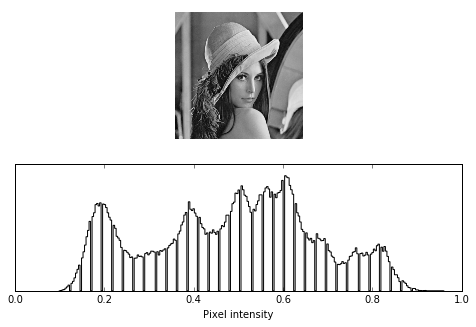

In [12]:
# Display figures
fig = plt.figure(figsize=(8, 5))
# Creating the axes with two subplot
axes = np.zeros((2,1), dtype=np.object)
axes[0,0] = fig.add_subplot(2, 1, 1)
axes[1,0] = fig.add_subplot(2, 1, 2)

### Now show the histogram of lena_im using the created axes (axes[:,0])
##...
ax_img, ax_hist = plot_img_and_hist(lena_im, axes[:,0])

From now, you are good to go in the world of digital image processing. However, always take care about the type of data you are dealing with and what results you are expecting from the different processes.

### Basic transformation functions

First, we will dig into the different basic transformation functions which allows to improve the contrast of grey scale images. All these functions are part of the `exposure` module of `skimage`.

In [13]:
# We can import this module now
from skimage import exposure

As previously done with the module `io`, you can use any function of this module using `exposure.name_of_the_function()`.

#### Log transformations

The log transformation increases the contrast of the low intensities in an image by stretching a narrow range of these low intensities into a wider range of intensities. However, the opposite is taking place regarding the high intensities.

Refer to [`exposure.adjust_log()`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#adjust-log) for the use of this function.

We recall the transformation function $s = c \log(1 + r)$. We illustrate this transformation by varying the parameter $c$.

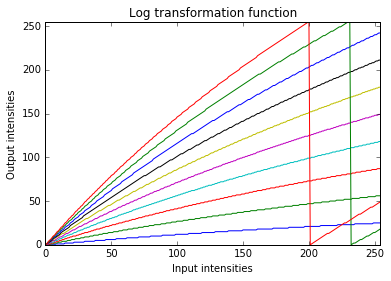

In [14]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(255, dtype='uint8')

# Define the parameter c
c = np.linspace(.1, 1.2, num=10)

# Plot the transform function
plt.figure()
for c_par in c:
    plt.plot(x, exposure.adjust_log(x, gain = c_par))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Log transformation function')
plt.axis('tight')
plt.show()

**Now this is your turn to make this transformation on a real image by using lena-im-float.**
Additionaly, we provide the code to show the histogram of the image. 

Later, use the log to increase the contrast of the magnitude image. Display the resulting image as well as its histogram.

In [15]:
# Show the image and its histogram
plt.figure()
plt.imshow(lena_im_float, cmap=cm.Greys_r)
plt.figure()
n, bins, patches = plt.hist(lena_im_float.flatten(), 256, normed=1, histtype='stepfilled')

# Apply a logarithm transformation
gain = 1.
lena_im_float_log = exposure.adjust_log(lena_im_float, gain=gain)
# Show the image after transformation and its transformation
plt.figure()
io.imshow(lena_im_float_log)
plt.figure()
n, bins, patches = plt.hist(lena_im_float_log.flatten(), 256, range=(0., np.max(lena_im_float_log.flatten())),
                            normed=1, histtype='stepfilled')

NameError: name 'lena_im_float' is not defined

**Note:** A good example where you can see the improvement and changes is to use the magnitude of the  Discrete Fourier Transform (DFT) of the image.
In order to get this image: 
1. Apply the `np.fft.fft2()` to get the fourier image
2. Magnitute are provided by the absolute values of this image
3. In order to move the center of the frequency to the center of the image we can apply `np.fft.fftshift()`

Now you can repeat the previous process on the magnitude image. 

In [19]:


# Compute the Fourier transform an get the magnitude and display it
lena_im_fft = np.fft.fft2(lena_im_float)
lena_im_mag = np.fft.fftshift(np.abs(lena_im_fft))


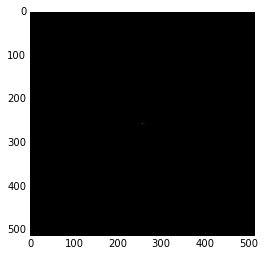

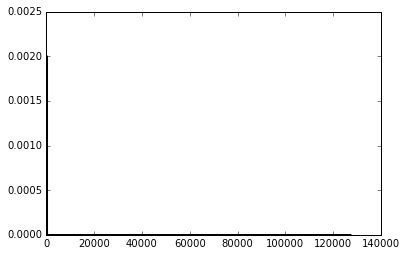

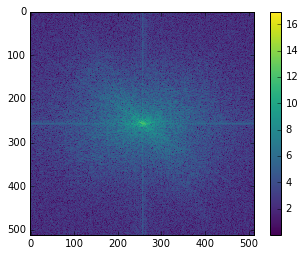

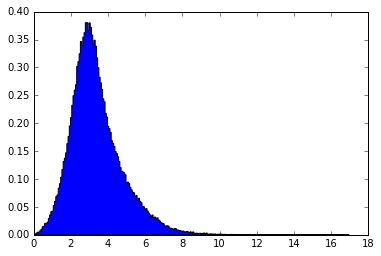

In [20]:
# Show the image and its histogram
plt.figure()
plt.imshow(lena_im_mag, cmap=cm.Greys_r)
plt.figure()
n, bins, patches = plt.hist(lena_im_mag.flatten(), 256, normed=1, histtype='stepfilled')

# Apply a logarithm transformation
gain = 1.
lena_im_mag_log = exposure.adjust_log(lena_im_mag, gain=gain)
# Show the image after transformation and its transformation
plt.figure()
io.imshow(lena_im_mag_log)
plt.figure()
n, bins, patches = plt.hist(lena_im_mag_log.flatten(), 256, range=(0., np.max(lena_im_mag_log.flatten())),
                            normed=1, histtype='stepfilled')

Note that you can compute the inverse function using the input argument `inv=True`. 

#### Power-Law (Gamma) transformation

By looking at the log transformation formulation, there is no ideal way to change the slope of the function. The gamma transformation offer this modulation using a parameter $\gamma$. The transformation function can be formulated as $s = cr^{\gamma}$.

We illustrate this transformation by varying the parameter $\gamma$.

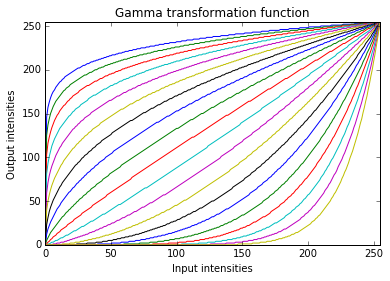

In [21]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(256, dtype='uint8')

# Define the parameter c
gamma = np.logspace(-1, 1., num=20)

# Plot the transform function
plt.figure()
for g in gamma:
    plt.plot(x, exposure.adjust_gamma(x, gamma=g, gain=1.))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Gamma transformation function')
plt.axis('tight')
plt.show()

**Use the gamma function on magnitude image to enhance the image for 10 different values of $\gamma$.**

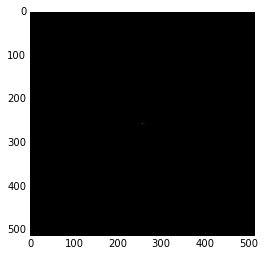

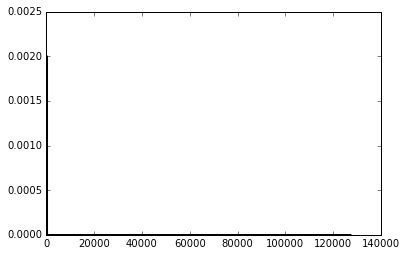

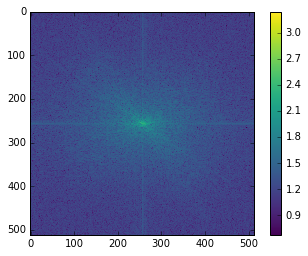

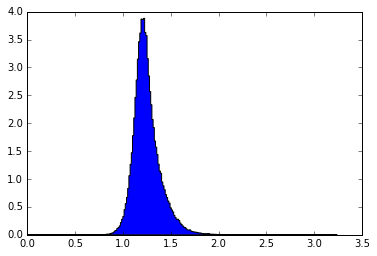

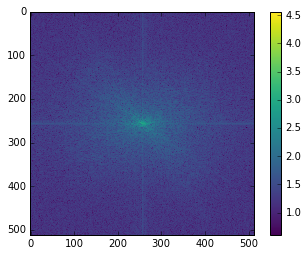

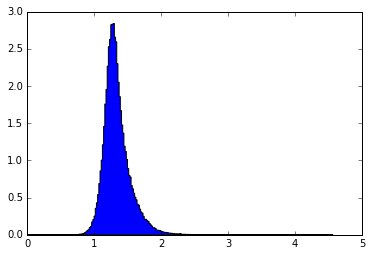

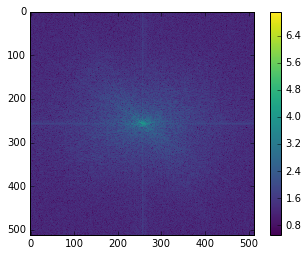

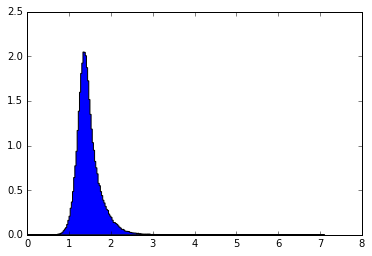

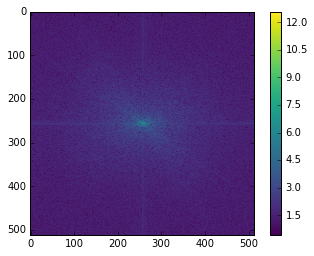

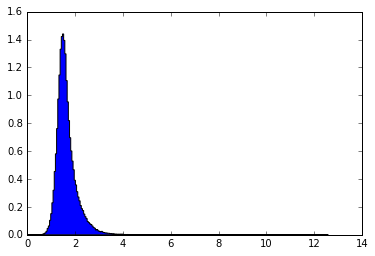

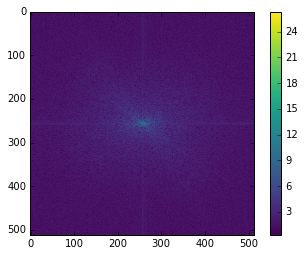

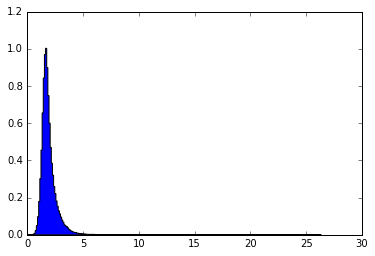

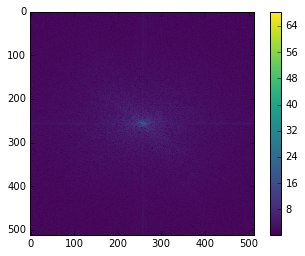

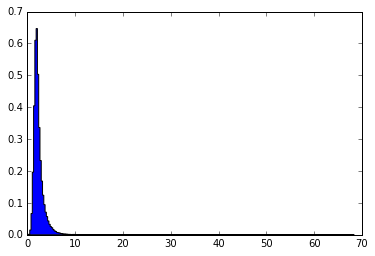

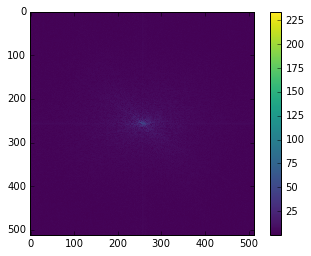

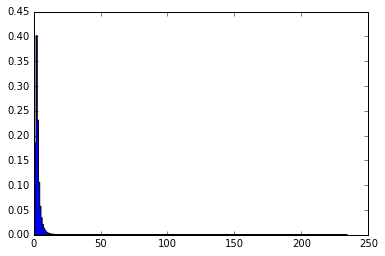

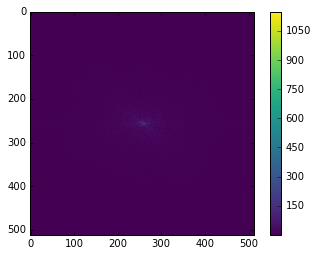

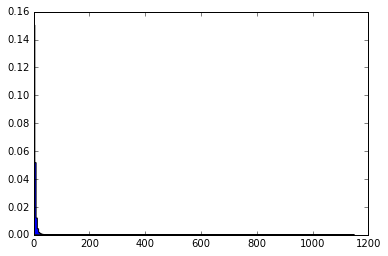

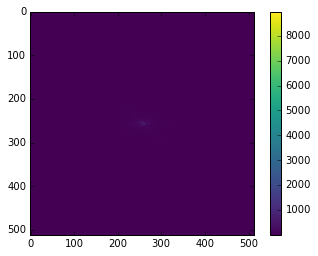

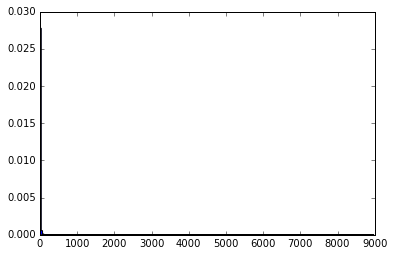

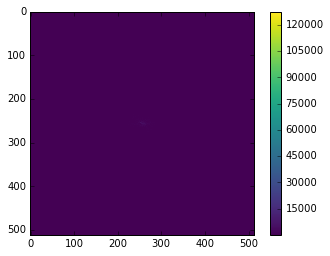

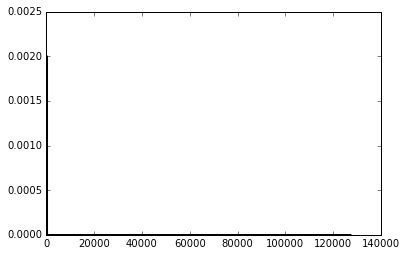

In [23]:
# Compute the Fourier transform an get the magnitude and display it
lena_im_fft = np.fft.fft2(lena_im_float)
lena_im_mag = np.fft.fftshift(np.abs(lena_im_fft))

# Show the magnitude image and its histogram
plt.figure()
plt.imshow(lena_im_mag, cmap=cm.Greys_r)
plt.figure()
n, bins, patches = plt.hist(lena_im_mag.flatten(), 256, normed=1, histtype='stepfilled')

# Apply a logarithm transformation
# Define the parameter
gain = 1.
gamma = np.logspace(-1, 0, num=10)

for g in gamma:
    lena_im_mag_log = exposure.adjust_gamma(lena_im_mag, gamma=g, gain=gain)
    # Show the image after transformation and its transformation
    plt.figure()
    io.imshow(lena_im_mag_log)
    plt.figure()
    n, bins, patches = plt.hist(lena_im_mag_log.flatten(), 256, range=(0., np.max(lena_im_mag_log.flatten())), 
                                normed=1, histtype='stepfilled')

#### Sigmoid transformation

This function also can be used to enhance the contrast in images.

The transformation function is formulated as $s = \frac{1}{1 + \exp{\left(c(t - r)\right)}}$.

We will illustrate the function by varying the parameter $t$.

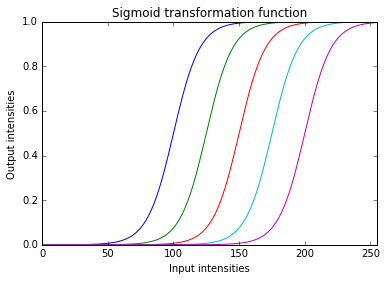

In [24]:
# Define a set of 256 values ranging from 0 to 255
x = np.arange(256, dtype='float')

# Define the parameter c
cut_off = np.linspace(100., 200., num=5)

# Plot the transform function
plt.figure()
for t in cut_off:
    plt.plot(x, exposure.adjust_sigmoid(x, cutoff=t, gain=.1))
plt.xlabel('Input intensities')
plt.ylabel('Output intensities')
plt.title('Sigmoid transformation function')
plt.axis('tight')
plt.show()

**Improve the contrast of the image `satellite.jpg` by setting the cut-off, once you observe the histogram of the image. You can set a gain equal to 10.**

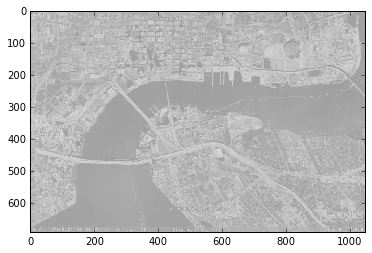

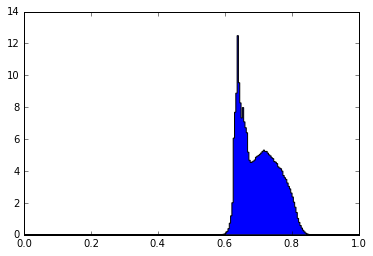

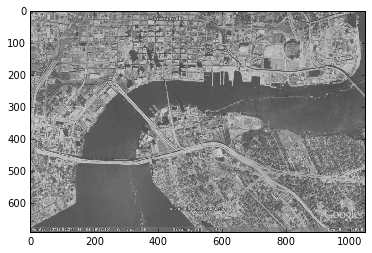

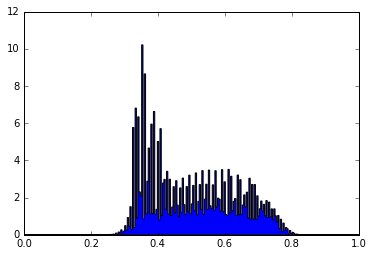

In [25]:
# Load the satellite image
sat_img_float = img_as_float(io.imread('./images/satellite.jpg', as_grey=True))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_img_float)
plt.figure()
n, bins, patches = plt.hist(sat_img_float.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

# Apply the sigmoid function on the first peak
sat_sig_1 = exposure.adjust_sigmoid(sat_img_float, cutoff=0.7, gain=10)

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_sig_1)
plt.figure()
n, bins, patches = plt.hist(sat_sig_1.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

#### Contrast stretching

Taking the satellite image as an example, it can be noticed that the intensitites are included in the range [0.6, 0.8]. A simple contrast stretching can be used to map the value of the intensity range [0.0, 1.0].

The function `exposure.rescale_intensity` is devoted for this purpose.

**Stretch the intensity value using this function.**

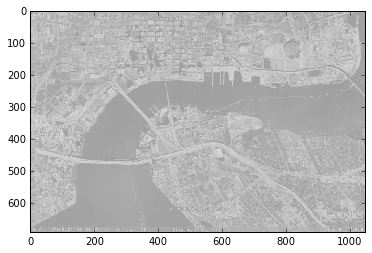

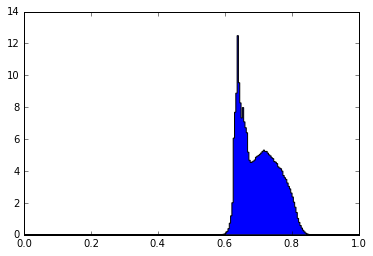

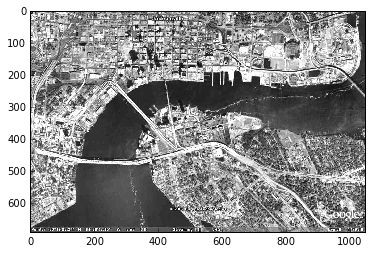

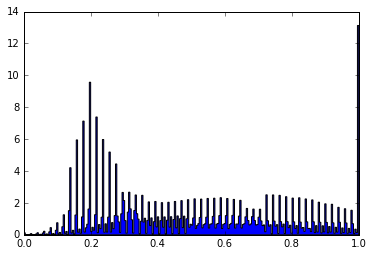

In [26]:
# Load the satellite image
sat_img_float = img_as_float(io.imread('./images/satellite.jpg', as_grey=True))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_img_float)
plt.figure()
n, bins, patches = plt.hist(sat_img_float.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

# Apply the sigmoid function on the first peak
sat_sig_1 = exposure.rescale_intensity(sat_img_float, in_range=(.6, .8), out_range=(0., 1.))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_sig_1)
plt.figure()
n, bins, patches = plt.hist(sat_sig_1.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

### Histogram processing

#### Histogram equalization

Histogram equalization can be used to enhance the contrast in images.

The idea behind the histogram equalization process is that each gray level should have an equal contribution in the image. The function allowing such transformation is in fact the cumulative density function.

The `exposure.equalize_hist` provide an optimized implementation for such processing. 

**Equalize the histogram of the satellite image.**

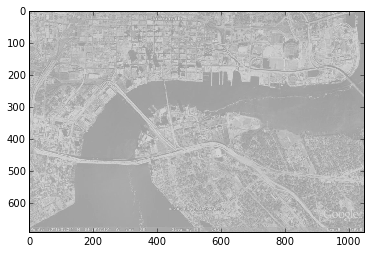

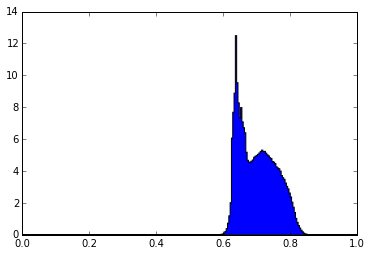

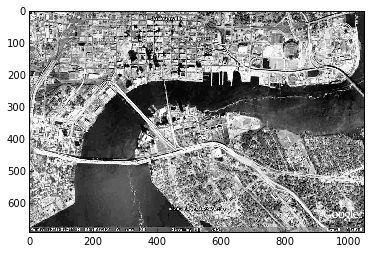

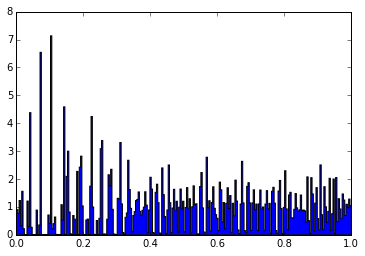

In [19]:
# Load the satellite image
sat_img_float = img_as_float(io.imread('./images/satellite.jpg', as_grey=True))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_img_float)
plt.figure()
n, bins, patches = plt.hist(sat_img_float.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

# Apply the sigmoid function on the first peak
sat_sig_1 = exposure.equalize_hist(sat_img_float, nbins=256)

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_sig_1)
plt.figure()
n, bins, patches = plt.hist(sat_sig_1.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

#### Adaptive (local) histogram equalization

The histogram equalization is a global process. The adaptive version allows to perform the histogram equalization for local areas. The contrast will be enhanced in dark and light area of an image which was not possible with the global processing.

The `exposure.equalize_adapthist` function corresponds to this processing in the `skimage`.

**Apply this algorithm for the satellite image with the default parameters regarding the region definition.**

/home/lemaitre/anaconda/lib/python2.7/site-packages/scikit_image-0.12.dev0-py2.7-linux-x86_64.egg/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/lemaitre/anaconda/lib/python2.7/site-packages/scikit_image-0.12.dev0-py2.7-linux-x86_64.egg/skimage/exposure/_adapthist.py:82: skimage_deprecation: `ntiles_*` have been deprecated in favor of `kernel_size`.  The `ntiles_*` keyword arguments will be removed in v0.14
  'will be removed in v0.14', skimage_deprecation)


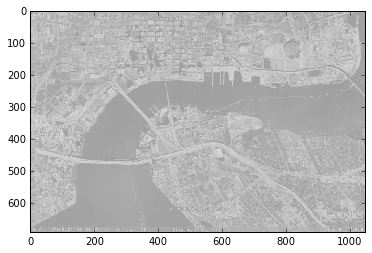

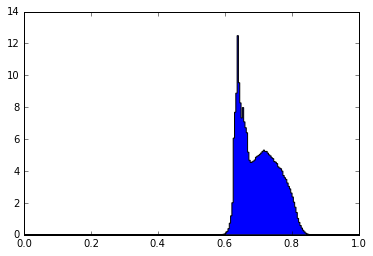

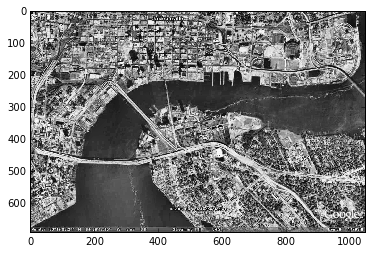

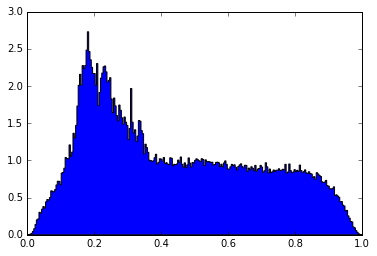

In [27]:
# Load the satellite image
sat_img_float = img_as_float(io.imread('./images/satellite.jpg', as_grey=True))

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_img_float)
plt.figure()
n, bins, patches = plt.hist(sat_img_float.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

# Apply the sigmoid function on the first peak
sat_sig_1 = exposure.equalize_adapthist(sat_img_float)

# Show the magnitude image and its histogram
plt.figure()
io.imshow(sat_sig_1)
plt.figure()
n, bins, patches = plt.hist(sat_sig_1.flatten(), 256, range=(0., 1.), normed=1, histtype='stepfilled')

Compare the results obtained with the global version of histogram equalization. Compare also the histogram obtained.

### Spatial filtering

#### Convolution by (almost) by hand

In the lecture, we saw that the convolution is the mathematical operator allowing to filter an image. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

**Use this image to filter the Lena image using a mean filter of size $9 \times 9$. You can use the function `np.ones` from `numpy` to create the proper mask.**

In [21]:
from scipy import ndimage

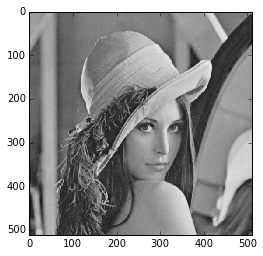

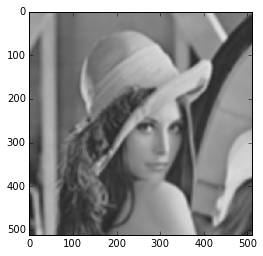

In [22]:
# Open Lena
lena_im_float = img_as_float(io.imread('./images/lena-grey.bmp'))

# Show Lena
io.imshow(lena_im_float)

# Create the mean filter
mask_mean = np.ones((9,9), dtype=float)
# Normalise the mask
mask_mean /= np.sum(np.sum(mask_mean))

# Compute the convolution
lena_mean_float = ndimage.filters.convolve(lena_im_float, mask_mean)

# Show the resulting image inside a new image
plt.figure()
io.imshow(lena_mean_float)

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

#### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [23]:
from skimage import filters

#####  First-order edge detector

We already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Lena image.**

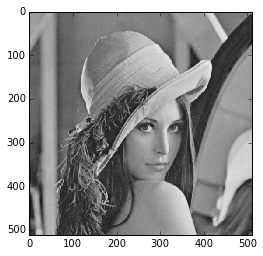

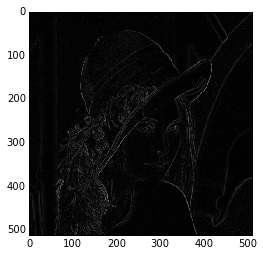

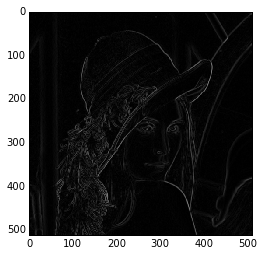

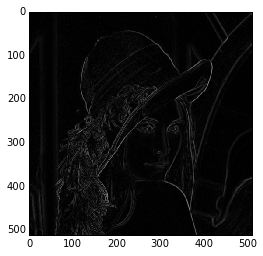

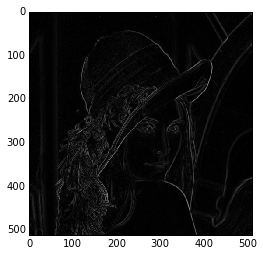

In [24]:
# Open Lena
lena_im_float = img_as_float(io.imread('./images/lena-grey.bmp'))

# Show Lena
io.imshow(lena_im_float)

# Compute the set of the different basic edge detector
### Compute Roberts
lena_roberts = filters.roberts(lena_im_float)
### Compute Prewitt
lena_prewitt = filters.prewitt(lena_im_float)
### Compute Sobel 
lena_sobel = filters.sobel(lena_im_float)
### Compute Scharr
lena_scharr = filters.scharr(lena_im_float)

# Plot the different resulting images
plt.figure()
io.imshow(lena_roberts)
plt.figure()
io.imshow(lena_prewitt)
plt.figure()
io.imshow(lena_sobel)
plt.figure()
io.imshow(lena_scharr)

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Lena image.**

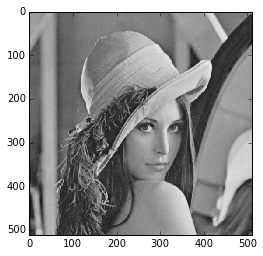

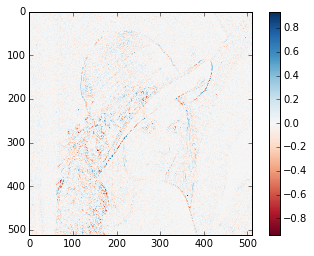

In [25]:
# Open Lena
lena_im_float = img_as_float(io.imread('./images/lena-grey.bmp'))

# Show Lena
io.imshow(lena_im_float)

# Compute the second order derivative using Laplace
lena_laplace = ndimage.filters.laplace(lena_im_float)

# Show the results
plt.figure()
io.imshow(lena_laplace)

##### Angular edge detector

In the previous section, edges are detected using the response of two kernels (i.e., horizontal and vertical kernels) which are later combined (i.e., magnitude and angle). Gabor filters is a family of filters which are sensitive to a specific angle and a specific frequency.

The `filters.gabor` in `skimage` implements this `filter.gabor`. 

**Apply this filters to find the edge at 60 degrees in Lena image. Try with different frequencies in the range [0.05, 0.5].**

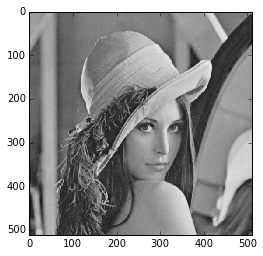

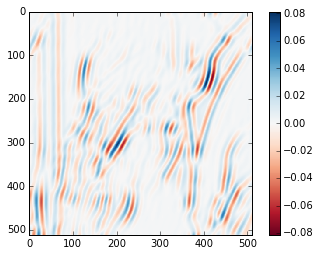

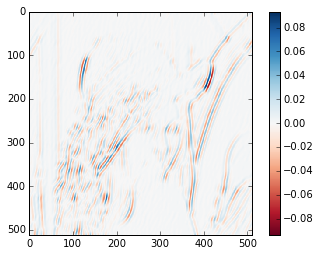

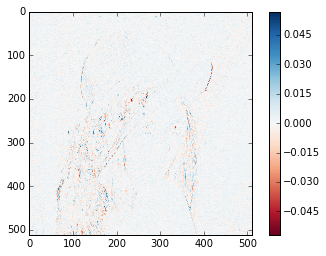

In [26]:
# Open Lena
lena_im_float = img_as_float(io.imread('./images/lena-grey.bmp'))

# Show Lena
io.imshow(lena_im_float)

# Define the different frequencies to use for the edge detection
freq = [.05, .1, .5]

for f in freq:
    plt.figure()
    lena_gabor_re, lena_gabor_im = filters.gabor_filter(lena_im_float, f, theta=60)
    io.imshow(lena_gabor_re)

#### Optimal edge detector - Canny edge detector

We saw during the lecture, the Canny edge detector which is also implemented in `skimage` in the `feature` module.

**Detect the edges in Lena image using Canny filter.**

In [27]:
from skimage import feature

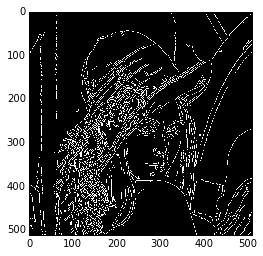

In [28]:
# Open Lena
lena_im_float = img_as_float(io.imread('./images/lena-grey.bmp'))

# Show Lena
io.imshow(lena_im_float)

# Call the canny detector with default parameter
canny_det = feature.canny(lena_im_float)

io.imshow(canny_det)

##### Denoising filters

During the lecture, we saw different filters which can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [29]:
from skimage import util

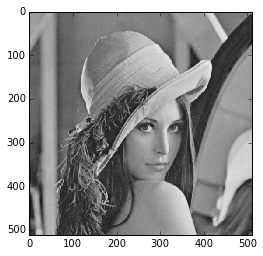

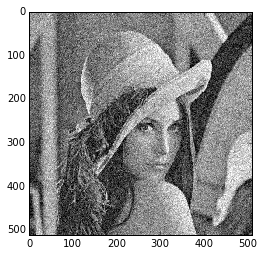

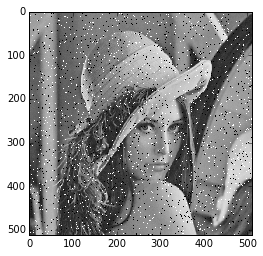

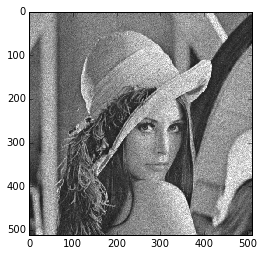

In [30]:
# Open Lena
lena_im_float = img_as_float(io.imread('./images/lena-grey.bmp'))

# Show Lena
io.imshow(lena_im_float)

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im_float, mode='gaussian')
lena_sp = util.random_noise(lena_im_float, mode='s&p')
lena_speckle = util.random_noise(lena_im_float, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.figure()
io.imshow(lena_sp)
plt.figure()
io.imshow(lena_speckle)

The first filter that we will study is the `mean` filter. 

**Apply this filter on the different corrupted Lena image with a mask corresponding to a disk of size 1, 5, and 10**. You can refer to `morphology.disk` regarding the structure element.

/home/lemaitre/anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


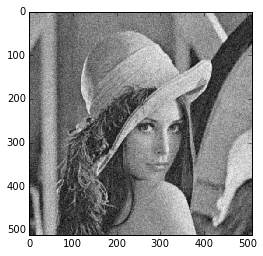

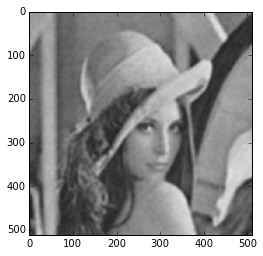

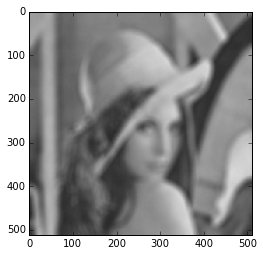

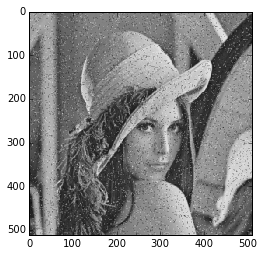

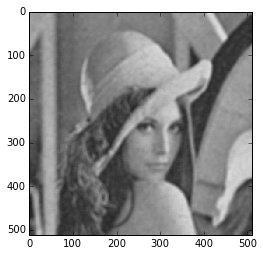

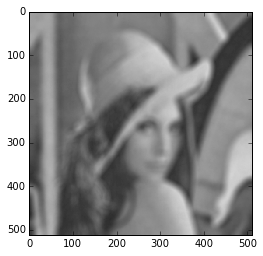

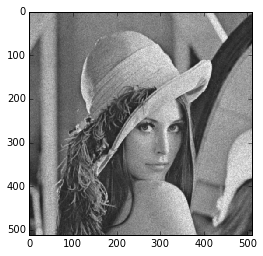

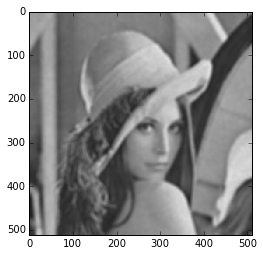

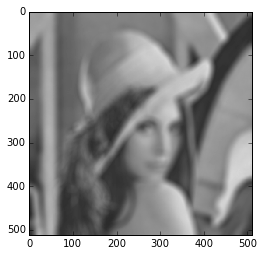

In [31]:
from skimage.morphology import disk

sz_disk = [1, 5, 10]

for sz in sz_disk:
    lena_smooth = filters.rank.mean(lena_gaussian, disk(sz))
    plt.figure()
    io.imshow(lena_smooth)
    
for sz in sz_disk:
    lena_smooth = filters.rank.mean(lena_sp, disk(sz))
    plt.figure()
    io.imshow(lena_smooth)
    
for sz in sz_disk:
    lena_smooth = filters.rank.mean(lena_speckle, disk(sz))
    plt.figure()
    io.imshow(lena_smooth)

We also so that the alpha-trimmed mean filter which work similarly to the normal mean filter. However, this filter considered only the grey values inside a specific range.

This function is implemented in `skimage` with the name `mean_percentile`.

**Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95]. Try with different dimension of disk radius.**

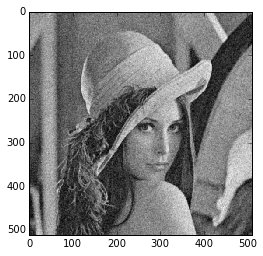

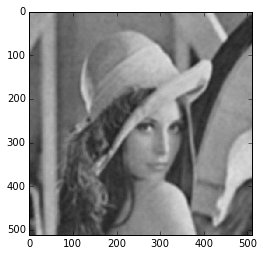

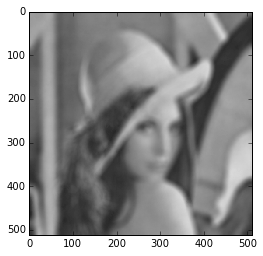

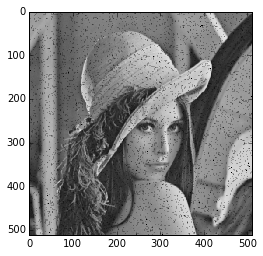

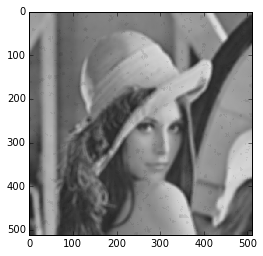

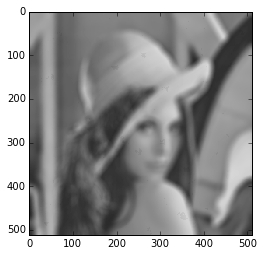

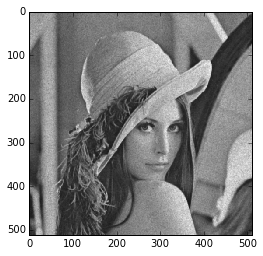

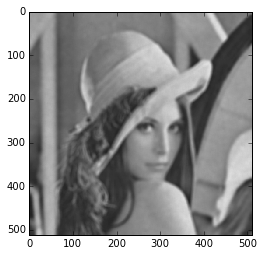

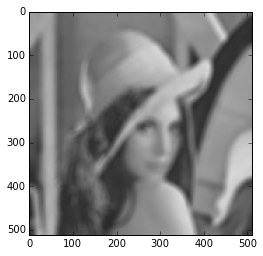

In [32]:
from skimage.morphology import disk

sz_disk = [1, 5, 10]
perc = [0.05, 0.95]

for sz in sz_disk:
    lena_smooth = filters.rank.mean_percentile(lena_gaussian, disk(sz), p0=0.05, p1=0.95)
    plt.figure()
    io.imshow(lena_smooth)
    
for sz in sz_disk:
    lena_smooth = filters.rank.mean_percentile(lena_sp, disk(sz), p0=0.05, p1=0.95)
    plt.figure()
    io.imshow(lena_smooth)
    
for sz in sz_disk:
    lena_smooth = filters.rank.mean_percentile(lena_speckle, disk(sz), p0=0.05, p1=0.95)
    plt.figure()
    io.imshow(lena_smooth)

Median filter performs better than mean filter in the presence of salt & peppers noise.

This filter is implemented in `skimage` in the function `median`.

**Apply this filtering method in the different Lena with the different radius as previously experimented.**

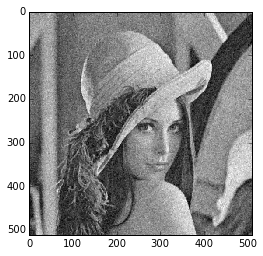

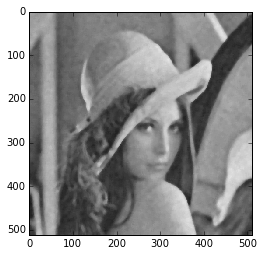

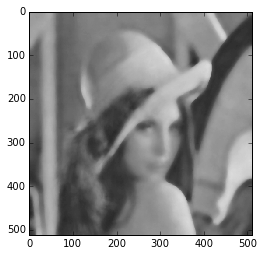

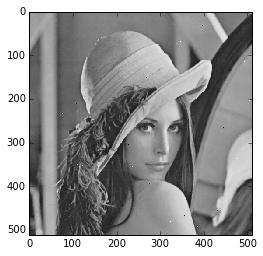

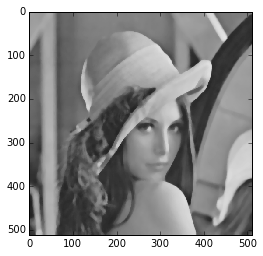

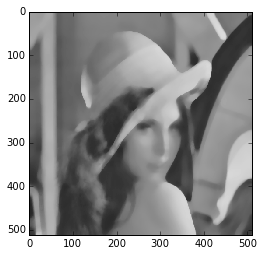

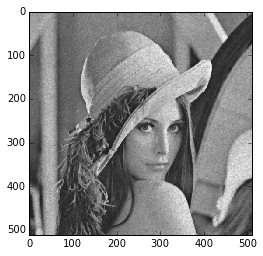

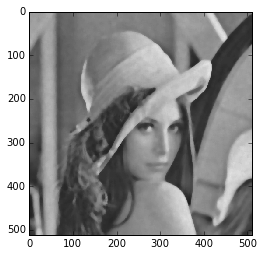

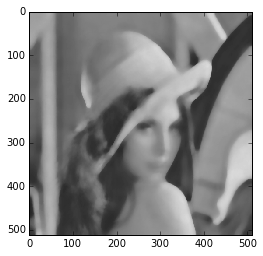

In [33]:
from skimage.morphology import disk

sz_disk = [1, 5, 10]

for sz in sz_disk:
    lena_smooth = filters.rank.median(lena_gaussian, disk(sz))
    plt.figure()
    io.imshow(lena_smooth)
    
for sz in sz_disk:
    lena_smooth = filters.rank.median(lena_sp, disk(sz))
    plt.figure()
    io.imshow(lena_smooth)
    
for sz in sz_disk:
    lena_smooth = filters.rank.median(lena_speckle, disk(sz))
    plt.figure()
    io.imshow(lena_smooth)

In the same manner, **apply the `maximum`, `minimum`, and `midpoint` filters.**

#### Optimal filter using Wiener filter.

We saw that Wiener filter is the optimal filter which minimize the least-square error.
This filter is implemented in the module `restoration` of `skimage`. 

**Apply this filter on the following blur and noisy image**

In [34]:
from skimage import restoration

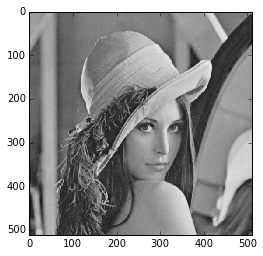

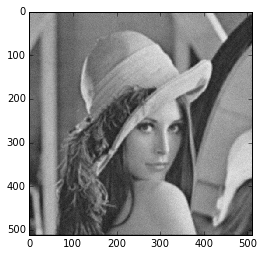

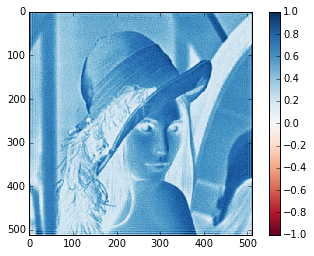

In [35]:
# Open Lena
lena_im_float = img_as_float(io.imread('./images/lena-grey.bmp'))

# Show Lena
io.imshow(lena_im_float)

from scipy.signal import convolve2d as conv2
psf = np.ones((5, 5)) / 25
lena_im_float = conv2(lena_im_float, psf, 'same')
lena_im_float += 0.1 * lena_im_float.std() * np.random.standard_normal(lena_im_float.shape)

plt.figure()
io.imshow(lena_im_float)

deconvolved, _ = restoration.unsupervised_wiener(lena_im_float, psf)

plt.figure()
io.imshow(deconvolved)

### Frequency filtering

We also saw that we can perform filtering in the frequency domain using the Fourier transform.

Using the algorithm presented in the lecture, filter the Lena image using a Sobel kernel.

In [36]:
def build_frequency_filter(h, sz_h_p):
    ###--- 1. Build a zero padded spatial filter $h_p(x,y)$ ---###
    # Create the zero padded spatial filter
    h_p = np.zeros(sz_h_p)
    # Find the center of the zero padded
    ctr_h_p = np.divide(sz_h_p, 2)
    # Assign the original filter
    h_p[ctr_h_p[0]:ctr_h_p[0] + np.size(h, 0),
        ctr_h_p[1]:ctr_h_p[1] + np.size(h, 1)] = h
    
    ###--- 2. Shift $h_p(x,y)$ by $(-1)^{x+y}$ ---###
    h_p_shifted = np.fft.fftshift(h_p)
    
    ###--- 3. Compute the DFT ---###
    H = np.fft.fft2(h_p_shifted)
    
    ###--- 4. Shift $H_p(u,v)$ by $(-1)^{x+y}$ ---###
    H_shifted = np.fft.fftshift(H)
    
    return H_shifted

In [37]:
def find_padding_size(img, h):
    # Get the size of the patch
    h_sz = h.shape
    img_sz = img.shape
    
    # Compute the future size
    height_pad = h_sz[0] + img_sz[0] - 1
    width_pad = h_sz[1] + img_sz[1] - 1
    
    if not (np.mod(height_pad, 2) == 1):
        height_pad = height_pad + 1
    if not (np.mod(width_pad, 2) == 1):
        width_pad = width_pad + 1
        
    future_size = (height_pad, width_pad)
        
    return future_size

In [38]:
def img_padding(img, sz_img):
    # Initialise and pad the image with zero
    img_p = np.zeros(sz_img)
    img_p[0:np.size(img, 0), 0:np.size(img, 1)] = img
    
    return img_p

In [39]:
def filtering_freq(img, filt_sp, verbose=True):
    
    ###--- 1. Find the size of the padded image ---#
    sz_img = find_padding_size(img, filt_sp)
    
    ###--- 2. Pad the image ---###
    img_p = img_padding(img, sz_img)
    if (verbose):
        plt.figure()
        io.imshow(img_p)
    
    ###--- 3. Compute the frequency filter ---###
    filter_freq = build_frequency_filter(filt_sp, sz_img)
    # We can keep only the imaginary part of the filter
    filter_freq = np.zeros(sz_img) + 1j * np.imag(filter_freq)
    if (verbose):
        plt.figure()
        io.imshow(exposure.adjust_log(np.abs(filter_freq)))
    
    ###--- 4. Compute the DFT of the image with additional shift ---###
    img_freq = np.fft.fftshift(np.fft.fft2(img_p))
    if (verbose):
        plt.figure()
        io.imshow(exposure.adjust_log(np.abs(img_freq)))
    
    ###--- 5. Apply the multiplication in the Fourier space ---###
    img_filt_freq = img_freq * filter_freq
    if (verbose):
        plt.figure()
        io.imshow(exposure.adjust_log(np.abs(img_filt_freq)))
    
    ###--- 6. Compute the inverse Fourier transform ---###
    img_filt_sp_p = np.fft.ifft2(np.fft.fftshift(img_filt_freq))
    
    ###--- 7. Crop the image at its original size ---###
    return img_filt_sp_p[0:img.shape[0], 0:img.shape[1]]

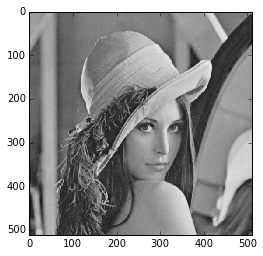

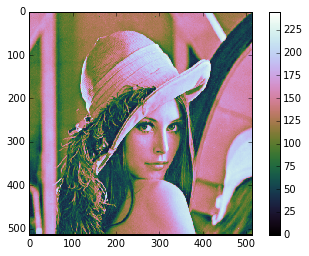

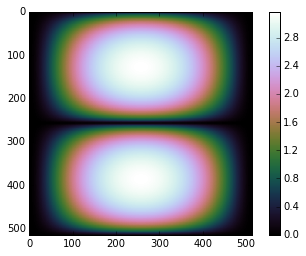

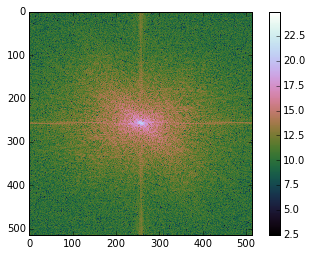

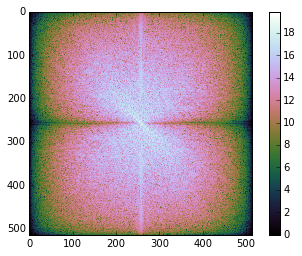

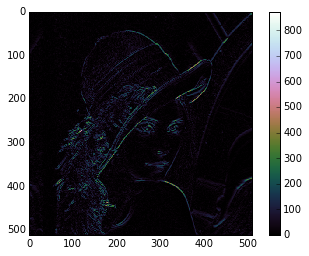

In [40]:
# Open Lena
from skimage import img_as_ubyte
lena_im = img_as_ubyte(io.imread('./images/lena-grey.bmp'))

# Show Lena
io.imshow(lena_im)

sobel_y_spat = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

result_img = filtering_freq(lena_im, sobel_y_spat)

plt.figure()
io.imshow(np.abs(result_img))

We also saw some typical low- and high-pass filters: (i) ideal, (ii) Butterworth, and (iii) Gaussian filters.
We recall the formulation of each of these filters.

* The ideal low-pass filter is formulated as: $H_{lp}(u,v) =
  \begin{cases}
    1  & \quad \text{if } D(u, v) \leq D_0\\
    0  & \quad \text{if } D(u, v) > D_0\\
  \end{cases}
$ with $D_0$ is a positive constant and $D(u,v)$ is the distance between the point $(u,v)$ and the center.
* The Butterworth low-pass filter is formulated as: $H_{lp}(u,v) = \frac{1}{1+[D(u,v)/D_0]^{2n}}$ with $n$ the order of the filter.
* The Gaussian low-pass filter is formulated as: $H_{lp}(u,v) = \exp{\left(-D^{2}(u,v)/D_0^{2}\right)}$.

The high-pass filter are obtained such that $H_{hp} = 1 - H_{lp}$.

** Implement and apply these filters.**

In [41]:
def compute_d_uv(uv, sz_filter):
    # Compute the euclidean distance between two points
    ### uv and sz_filter are tuples
    
    # Compute the center
    h_ctr = sz_filter[0] / 2.
    w_ctr = sz_filter[1] / 2.
    
    # Recenter the coordinate of our current point
    u = uv[0] - h_ctr
    v = uv[1] - w_ctr
    
    # Euclidean distance
    return np.sqrt((u) ** 2. + (v) ** 2.)

In [42]:
def ideal_low_pass(D0, sz_filter):
    # Initialise the filter
    ### Since that it is a low pass filter, let's put all the values to zero
    H = np.zeros(sz_filter)
    
    # However, we need to recenter the pixel first
    from itertools import product
    
    for px in product(range(sz_filter[0]), range(sz_filter[1])):
        
        # Compute the distance
        d_uv = compute_d_uv(px, sz_filter)
        
        # Affect the corresponding value
        if d_uv <= D0:
            H[px[0], px[1]] = 1
            
    return H

In [43]:
def ideal_high_pass(D0, sz_filter):
    return 1. - ideal_low_pass(D0, sz_filter)

In [44]:
def butterworth_low_pass(D0, n, sz_filter):
    # Initialise the filter
    ### Since that it is a low pass filter, let's put all the values to zero
    H = np.zeros(sz_filter)
    
    # However, we need to recenter the pixel first
    from itertools import product
    
    for px in product(range(sz_filter[0]), range(sz_filter[1])):
        
        # Compute the distance
        d_uv = compute_d_uv(px, sz_filter)
        
        # Affect the corresponding value
        H[px[0], px[1]] = 1. / (1. + (d_uv / float(D0))**(2.*n))
            
    return H

In [45]:
def butterworth_high_pass(D0, n, sz_filter):
    return 1. - butterworth_low_pass(D0, n, sz_filter)

In [46]:
def gaussian_low_pass(D0, sz_filter):
    # Initialise the filter
    ### Since that it is a low pass filter, let's put all the values to zero
    H = np.zeros(sz_filter)
    
    # However, we need to recenter the pixel first
    from itertools import product
    
    for px in product(range(sz_filter[0]), range(sz_filter[1])):
        
        # Compute the distance
        d_uv = compute_d_uv(px, sz_filter)
        
        # Affect the corresponding value
        H[px[0], px[1]] = np.exp(-d_uv ** 2. / float(2. * D0)**(2.))
            
    return H

In [47]:
def gaussian_high_pass(D0, sz_filter):
    return 1. - gaussian_low_pass(D0, sz_filter)

In [48]:
def apply_filter(img, H_filter, verbose=False):
        
    ###--- 4. Compute the DFT of the image with additional shift ---###
    img_freq = np.fft.fftshift(np.fft.fft2(img))
    if (verbose):
        plt.figure()
        io.imshow(exposure.adjust_log(np.abs(H_filter)))
    
    ###--- 5. Apply the multiplication in the Fourier space ---###
    img_filt_freq = img_freq * H_filter
    if (verbose):
        plt.figure()
        io.imshow(exposure.adjust_log(np.abs(img_filt_freq)))
    
    ###--- 6. Compute the inverse Fourier transform ---###
    img_filt_sp_p = np.fft.ifft2(np.fft.fftshift(img_filt_freq))
    
    return np.real(img_filt_sp_p)

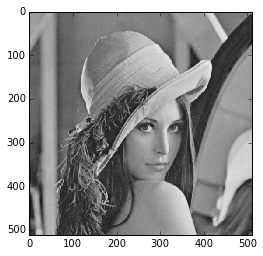

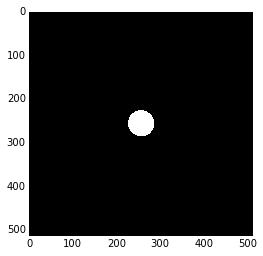

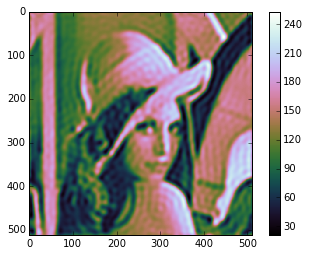

In [49]:
# Open Lena
from skimage import img_as_ubyte
lena_im = img_as_ubyte(io.imread('./images/lena-grey.bmp'))

# Show Lena
io.imshow(lena_im)

# Create the filter
H = ideal_low_pass(30, lena_im.shape)
plt.figure()
io.imshow(H)

# Apply the filter
plt.figure()
io.imshow(apply_filter(lena_im, H))

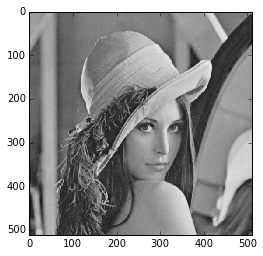

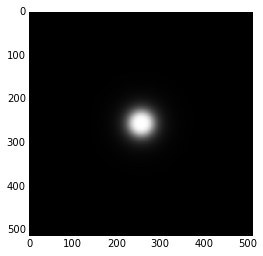

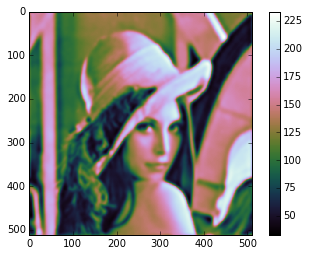

In [50]:
# Open Lena
from skimage import img_as_ubyte
lena_im = img_as_ubyte(io.imread('./images/lena-grey.bmp'))

# Show Lena
io.imshow(lena_im)

# Create the filter
H = butterworth_low_pass(30, 2., lena_im.shape)
plt.figure()
io.imshow(H)

# Apply the filter
plt.figure()
io.imshow(apply_filter(lena_im, H))

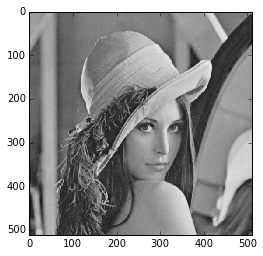

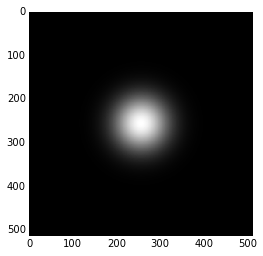

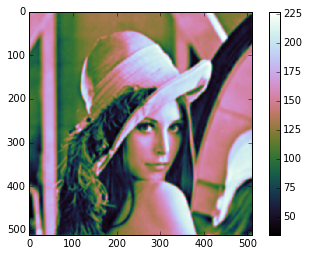

In [51]:
# Open Lena
from skimage import img_as_ubyte
lena_im = img_as_ubyte(io.imread('./images/lena-grey.bmp'))

# Show Lena
io.imshow(lena_im)

# Create the filter
H = gaussian_low_pass(30, lena_im.shape)
plt.figure()
io.imshow(H)

# Apply the filter
plt.figure()
io.imshow(apply_filter(lena_im, H))

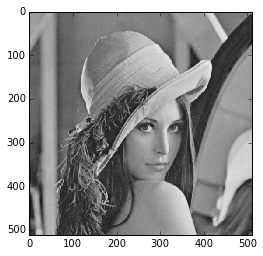

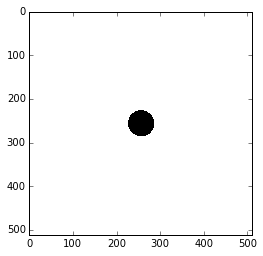

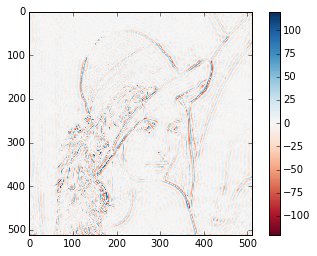

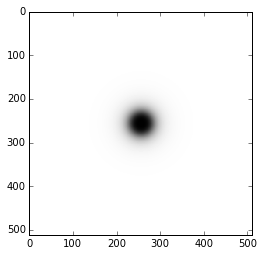

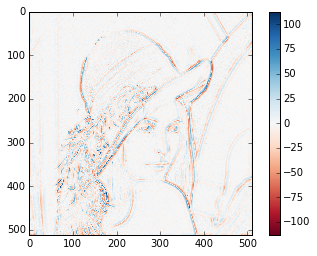

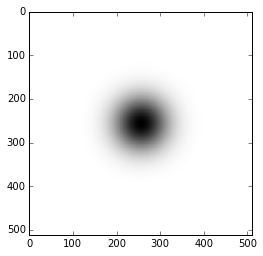

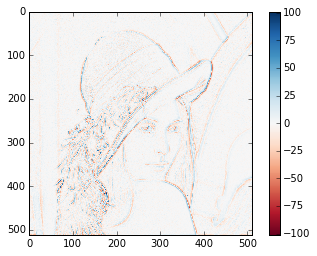

In [52]:
# Open Lena
from skimage import img_as_ubyte
lena_im = img_as_ubyte(io.imread('./images/lena-grey.bmp'))

# Show Lena
io.imshow(lena_im)

# Create the filter
H = ideal_high_pass(30, lena_im.shape)
plt.figure()
io.imshow(H)

# Apply the filter
plt.figure()
io.imshow(apply_filter(lena_im, H))

# Create the filter
H = butterworth_high_pass(30, 2., lena_im.shape)
plt.figure()
io.imshow(H)

# Apply the filter
plt.figure()
io.imshow(apply_filter(lena_im, H))

# Create the filter
H = gaussian_high_pass(30, lena_im.shape)
plt.figure()
io.imshow(H)

# Apply the filter
plt.figure()
io.imshow(apply_filter(lena_im, H))

### Morphological transformation

During the lecture, we presented several basic morphological operation. They are present in the module `morphology` in the `skimage`. 

**Using the image `bin_image.png`, apply successively the `erosion`, `dilation`, `opening`, `closing`, and `skeletonize`.** Use any structural element that you like.

In [53]:
from skimage import morphology

/home/lemaitre/anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warnings.warn("Low image dynamic range; displaying image with "


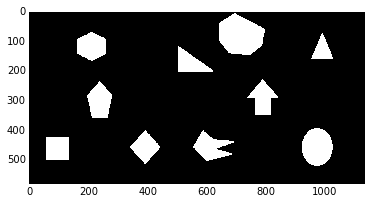

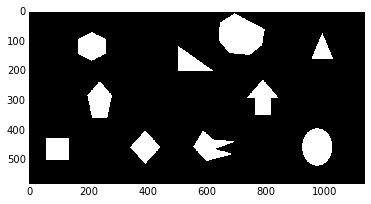

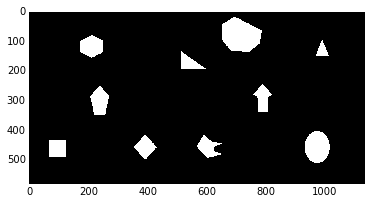

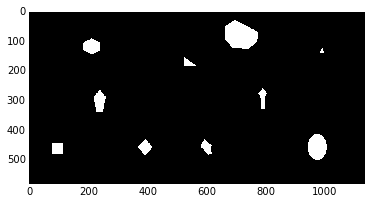

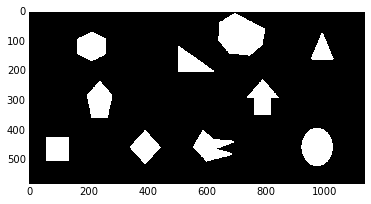

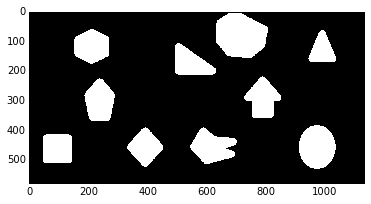

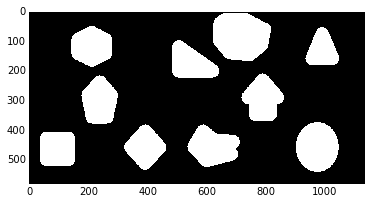

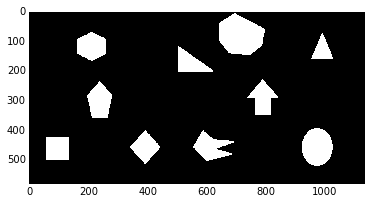

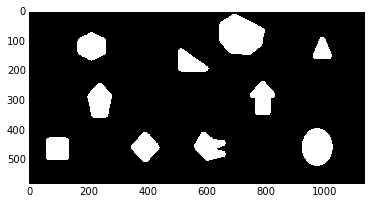

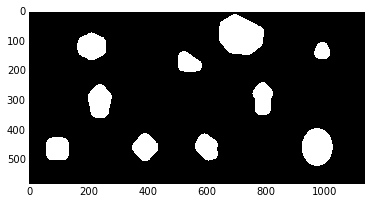

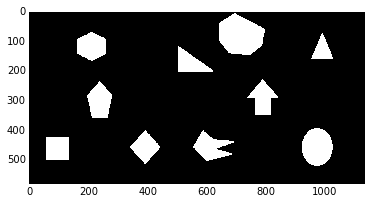

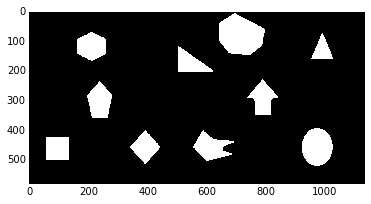

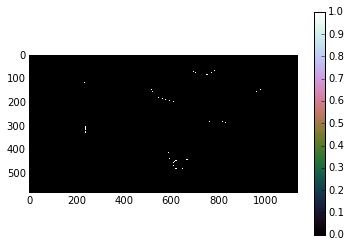

In [54]:
# Open the image
from skimage import img_as_ubyte
im = img_as_ubyte(io.imread('./images/bin_image.png', as_grey=True))

# Show the image
io.imshow(im)

# Erode the image using different size of disk
disk_sz = [1, 10, 20]

for sz in disk_sz:
    er_im  = morphology.erosion(im, morphology.disk(sz))
    plt.figure()
    io.imshow(er_im)
    
# Dilate the image using different size of disk
for sz in disk_sz:
    er_im  = morphology.dilation(im, morphology.disk(sz))
    plt.figure()
    io.imshow(er_im)
    
# Open the image using different size of disk
for sz in disk_sz:
    er_im  = morphology.opening(im, morphology.disk(sz))
    plt.figure()
    io.imshow(er_im)
    
# Closing the image using different size of disk
for sz in disk_sz:
    er_im  = morphology.closing(im, morphology.disk(sz))
    plt.figure()
    io.imshow(er_im)
    
sk_im = morphology.skeletonize(im > 125)
io.imshow(sk_im)